In [ ]:
import psycopg2

# PostgreSQL database connection details
postgres_host = 'localhost'
postgres_port = '5432'
postgres_db = 'group-two-storage'
postgres_user = 'Sage9705'
postgres_password = 'GroupTwoPipeline'

# Connect to PostgreSQL
conn = psycopg2.connect(
    host=postgres_host,
    port=postgres_port,
    database=postgres_db,
    user=postgres_user,
    password=postgres_password
)

# Define SQL queries
query_1 = "SELECT SUM(transaction_amount) AS total_transaction_amount FROM companies;"
query_2 = "SELECT COUNT(DISTINCT company) AS unique_companies FROM companies;"
query_3 = "SELECT company, AVG(transaction_amount) AS avg_transaction_amount FROM companies GROUP BY company;"
query_4 = "SELECT company, SUM(transaction_amount) AS total_transaction_amount FROM companies GROUP BY company ORDER BY total_transaction_amount DESC LIMIT 1;"
query_5 = "SELECT transaction_amount FROM companies;"
query_6 = "SELECT EXTRACT(MONTH FROM transaction_date) AS month, SUM(transaction_amount) AS total_transaction_amount FROM companies GROUP BY month;"
query_7 = "SELECT AVG(transaction_amount) AS avg_transaction_amount, customer_preference FROM companies GROUP BY customer_preference;"
query_8 = "SELECT communication_method, COUNT(*) AS count FROM companies GROUP BY communication_method ORDER BY count DESC;"
query_9 = "SELECT address, AVG(transaction_amount) AS avg_transaction_amount FROM companies GROUP BY address ORDER BY avg_transaction_amount DESC;"
query_10 = "SELECT customer_preference, COUNT(*) AS count FROM companies GROUP BY customer_preference ORDER BY count DESC;"

# Execute queries and fetch results
def execute_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    cursor.close()
    return result

result_1 = execute_query(query_1)
result_2 = execute_query(query_2)
result_3 = execute_query(query_3)
result_4 = execute_query(query_4)
result_5 = execute_query(query_5)
result_6 = execute_query(query_6)
result_7 = execute_query(query_7)
result_8 = execute_query(query_8)
result_9 = execute_query(query_9)
result_10 = execute_query(query_10)

# Print results
print("1. Total transaction amount across all companies:", result_1[0][0])
print("2. Number of unique companies:", result_2[0][0])
print("3. Average transaction amount per company:")
for row in result_3:
    print("   ", row[0], ":", row[1])
print("4. Company with the highest total transaction amount:", result_4[0][0])
print("5. Distribution of transaction amounts:", [row[0] for row in result_5])
print("6. Total transaction amount per month:")
for row in result_6:
    print("   Month:", int(row[0]), ", Total Amount:", row[1])
print("7. Average transaction amount per customer preference:")
for row in result_7:
    print("   ", row[1], ":", row[0])
print("8. Most common communication methods:")
for row in result_8:
    print("   Method:", row[0], ", Count:", row[1])
print("9. Average transaction amount by address:")
for row in result_9:
    print("   Address:", row[0], ", Average Amount:", row[1])
print("10. Count of customer preferences:")
for row in result_10:
    print("    Preference:", row[0], ", Count:", row[1])



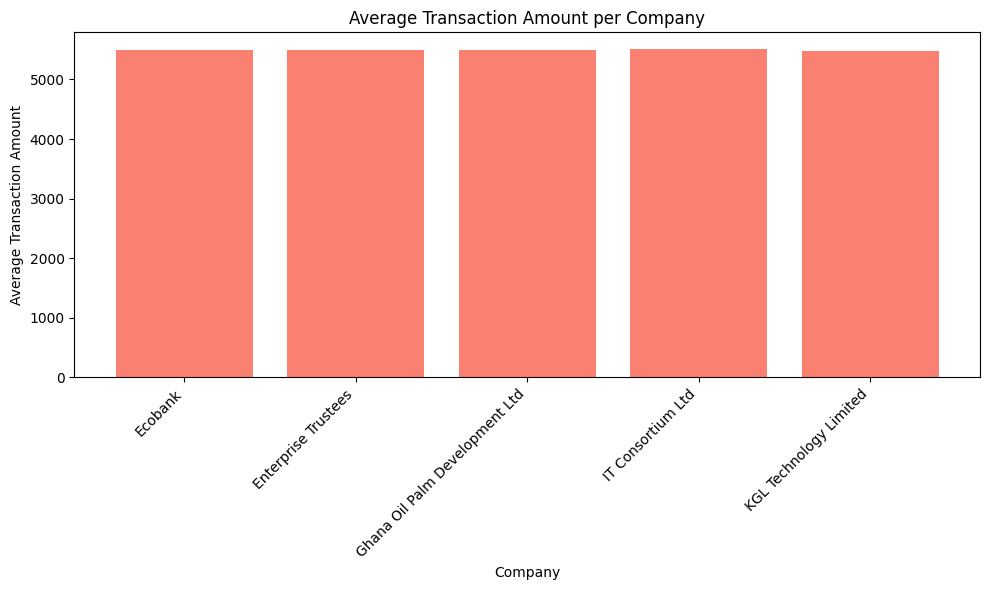

In [32]:
import matplotlib.pyplot as plt

# Data from SQL queries (replace with actual results)
total_transaction_amount = result_1[0][0]
unique_companies = result_2[0][0]
avg_transaction_per_company = [(row[0], row[1]) for row in result_3]


# Visualization 3: Bar plot for average transaction amount per company
company_names = [row[0] for row in avg_transaction_per_company]
avg_transaction_amounts = [row[1] for row in avg_transaction_per_company]
plt.figure(figsize=(10, 6))
plt.bar(company_names, avg_transaction_amounts, color='salmon')
plt.xlabel('Company')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount per Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


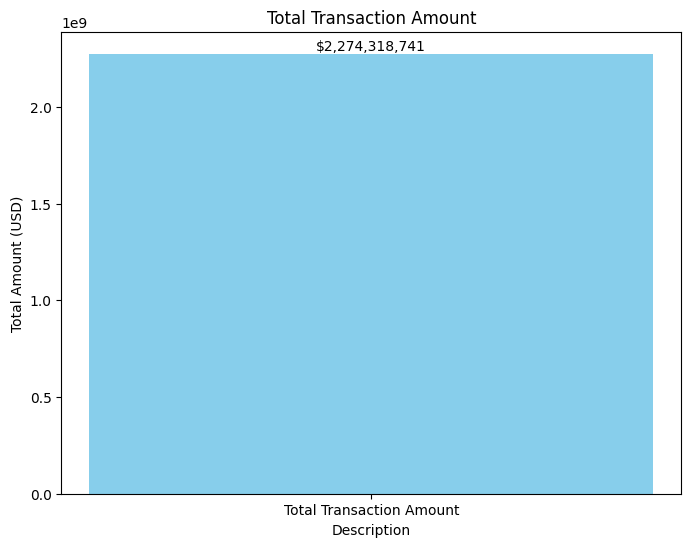

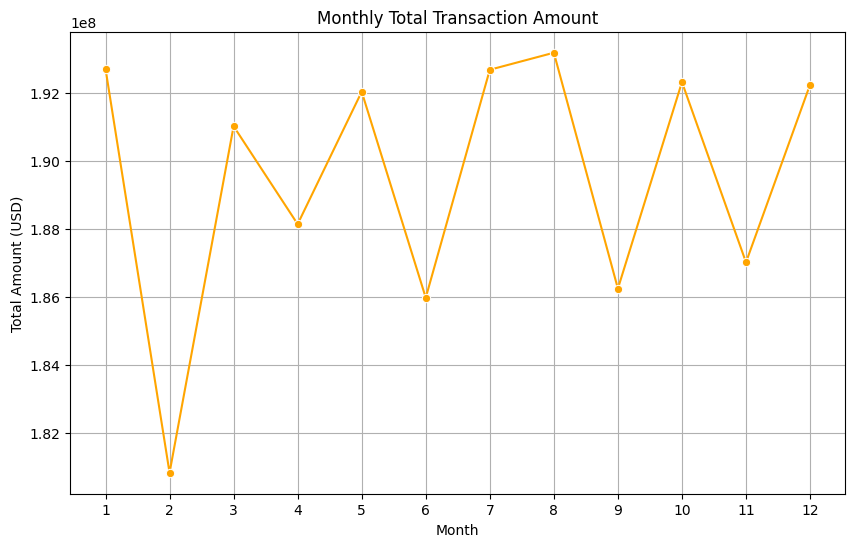

C:\Users\SMK9\AppData\Local\Temp\ipykernel_14588\486580096.py:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




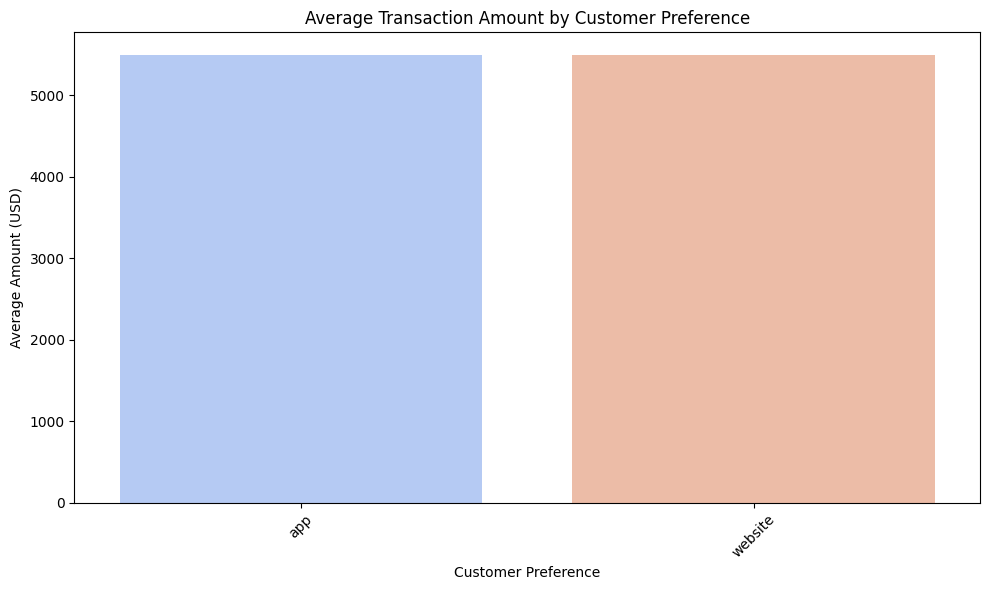

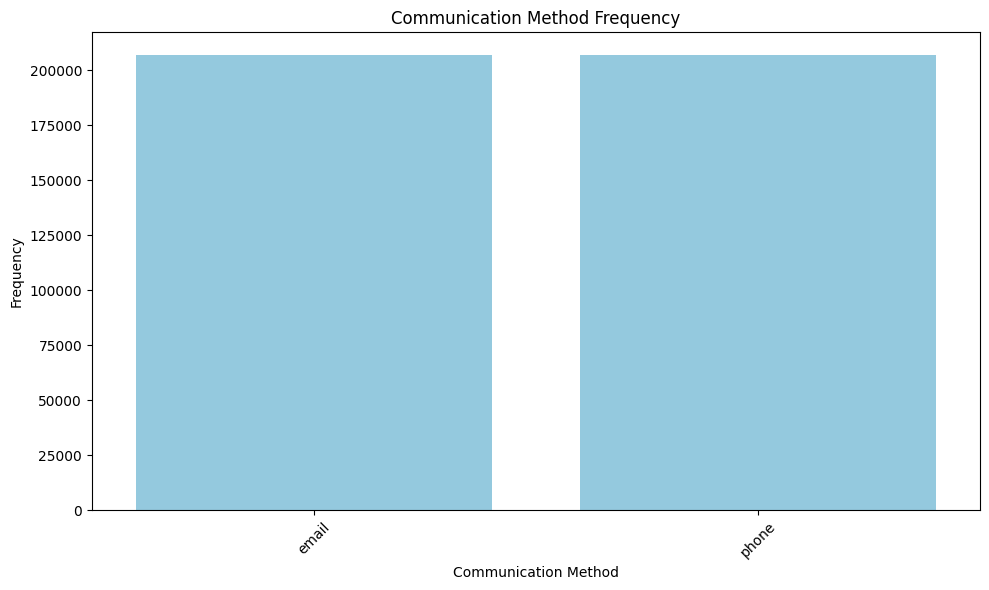

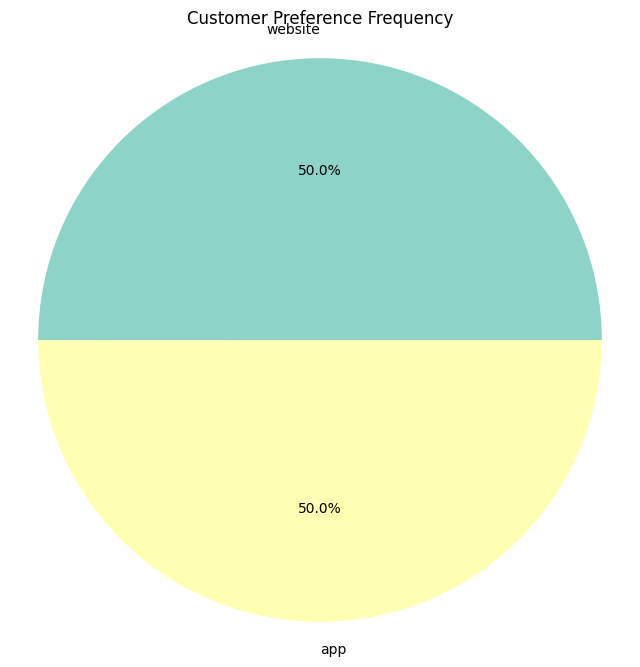

In [38]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PostgreSQL database connection details
postgres_host = 'localhost'
postgres_port = '5432'
postgres_db = 'group-two-storage'
postgres_user = 'Sage9705'
postgres_password = 'GroupTwoPipeline'

# Connect to PostgreSQL
conn = psycopg2.connect(
    host=postgres_host,
    port=postgres_port,
    database=postgres_db,
    user=postgres_user,
    password=postgres_password
)

# Define SQL queries
queries = [
    "SELECT SUM(transaction_amount) AS total_transaction_amount FROM companies;",
    "SELECT COUNT(DISTINCT company) AS unique_companies FROM companies;",
    "SELECT EXTRACT(MONTH FROM transaction_date) AS month, SUM(transaction_amount) AS total_transaction_amount FROM companies GROUP BY month;",
    "SELECT AVG(transaction_amount) AS avg_transaction_amount, customer_preference FROM companies GROUP BY customer_preference;",
    "SELECT communication_method, COUNT(*) AS count FROM companies GROUP BY communication_method ORDER BY count DESC;",
    "SELECT customer_preference, COUNT(*) AS count FROM companies GROUP BY customer_preference ORDER BY count DESC;"
]

# Execute queries and fetch results
def execute_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    cursor.close()
    return result

results = [execute_query(query) for query in queries]

# Visualize results
def visualize_total_transaction_amount(result):
    total_transaction_amount = result[0][0]
    plt.figure(figsize=(8, 6))
    plt.bar("Total Transaction Amount", total_transaction_amount, color='skyblue')
    plt.text("Total Transaction Amount", total_transaction_amount, f'${total_transaction_amount:,.0f}', ha='center', va='bottom')
    plt.xlabel('Description')
    plt.ylabel('Total Amount (USD)')
    plt.title('Total Transaction Amount')
    plt.show()


def visualize_monthly_transaction_amounts(result):
    df = pd.DataFrame(result, columns=['Month', 'Total Transaction Amount'])
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Month', y='Total Transaction Amount', data=df, marker='o', color='orange')
    plt.xlabel('Month')
    plt.ylabel('Total Amount (USD)')
    plt.title('Monthly Total Transaction Amount')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

def visualize_avg_transaction_amount_by_preference(result):
    df = pd.DataFrame(result, columns=['Avg Transaction Amount', 'Customer Preference'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Customer Preference', y='Avg Transaction Amount', data=df, palette='coolwarm')
    plt.xlabel('Customer Preference')
    plt.ylabel('Average Amount (USD)')
    plt.title('Average Transaction Amount by Customer Preference')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def visualize_communication_method_frequency(result):
    df = pd.DataFrame(result, columns=['Communication Method', 'Count'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Communication Method', y='Count', data=df, color='skyblue')
    plt.xlabel('Communication Method')
    plt.ylabel('Frequency')
    plt.title('Communication Method Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def visualize_customer_preference_frequency(result):
    df = pd.DataFrame(result, columns=['Customer Preference', 'Count'])
    plt.figure(figsize=(8, 8))
    plt.pie(df['Count'], labels=df['Customer Preference'], autopct='%1.1f%%', colors=sns.color_palette('Set3'))
    
    plt.title('Customer Preference Frequency')
    plt.axis('equal')
    plt.show()

# Visualize each query result
visualize_total_transaction_amount(results[0])
visualize_monthly_transaction_amounts(results[2])
visualize_avg_transaction_amount_by_preference(results[3])
visualize_communication_method_frequency(results[4])
visualize_customer_preference_frequency(results[5])
